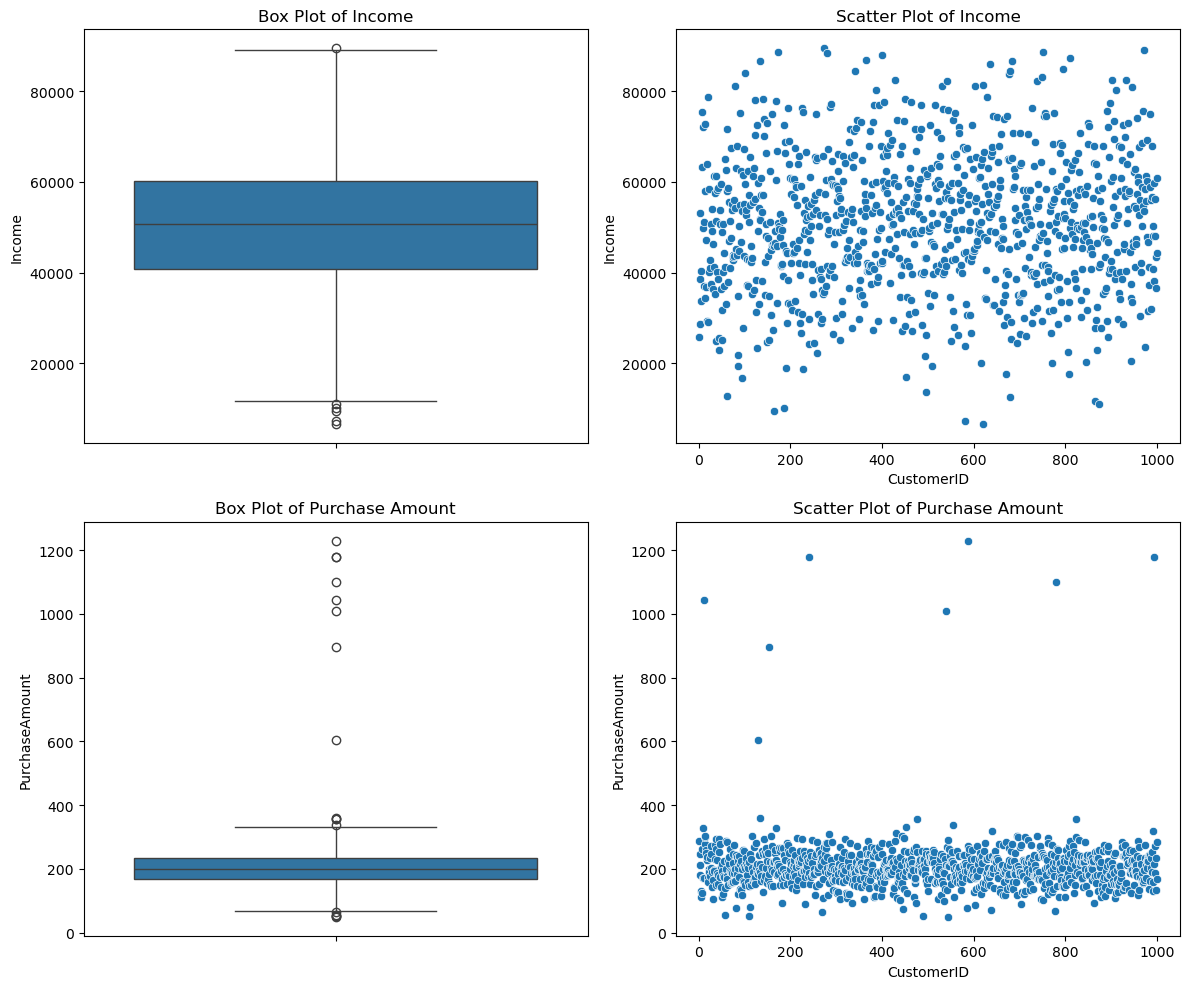

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the file path if needed)
file_path = 'C:/Users/gunde/Downloads/customer_data.csv' # Update this with your file's path
df = pd.read_csv(file_path)

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot and scatter plot for 'Income'
sns.boxplot(y='Income', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Income')

sns.scatterplot(x='CustomerID', y='Income', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot of Income')

# Boxplot and scatter plot for 'PurchaseAmount'
sns.boxplot(y='PurchaseAmount', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Purchase Amount')

sns.scatterplot(x='CustomerID', y='PurchaseAmount', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of Purchase Amount')

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# Function to find outliers using the IQR method
def handle_outliers_iqr(df, column, method='remove'):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'remove':
        # Remove outliers
        df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df_cleaned
    elif method == 'cap':
        # Cap outliers
        df_capped = df.copy()
        df_capped[column] = df_capped[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        return df_capped
    else:
        raise ValueError("Method must be 'remove' or 'cap'.")

# Apply IQR method on "Income" and "PurchaseAmount" columns
# Remove outliers
df_income_cleaned = handle_outliers_iqr(df, 'Income', method='remove')
df_purchase_cleaned = handle_outliers_iqr(df, 'PurchaseAmount', method='remove')

# Cap outliers
df_income_capped = handle_outliers_iqr(df, 'Income', method='cap')
df_purchase_capped = handle_outliers_iqr(df, 'PurchaseAmount', method='cap')

# Display the results
print("Original Data Shape:", df.shape)
print("Data Shape after removing Income outliers:", df_income_cleaned.shape)
print("Data Shape after removing PurchaseAmount outliers:", df_purchase_cleaned.shape)

print("\nCapped Income column (first few rows):")
print(df_income_capped[['Income']].head())

print("\nCapped PurchaseAmount column (first few rows):")
print(df_purchase_capped[['PurchaseAmount']].head())


Original Data Shape: (1000, 5)
Data Shape after removing Income outliers: (994, 5)
Data Shape after removing PurchaseAmount outliers: (983, 5)

Capped Income column (first few rows):
    Income
0  25903.0
1  53051.0
2  38654.0
3  28666.0
4  40301.0

Capped PurchaseAmount column (first few rows):
   PurchaseAmount
0           286.0
1           180.0
2           211.0
3           246.0
4           129.0


In [11]:
import pandas as pd
from scipy import stats

# Function to handle outliers using Z-score method
def handle_outliers_zscore(df, column, method='remove', threshold=3):
    # Calculate Z-scores for the column
    z_scores = stats.zscore(df[column])
    
    if method == 'remove':
        # Remove outliers
        df_cleaned = df[(z_scores > -threshold) & (z_scores < threshold)]
        return df_cleaned
    elif method == 'cap':
        # Cap outliers
        mean = df[column].mean()
        std_dev = df[column].std()
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
        
        df_capped = df.copy()
        df_capped[column] = df_capped[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        return df_capped
    else:
        raise ValueError("Method must be 'remove' or 'cap'.")

# Apply Z-score method on "Income" and "PurchaseAmount" columns
# Remove outliers
df_income_cleaned_z = handle_outliers_zscore(df, 'Income', method='remove')
df_purchase_cleaned_z = handle_outliers_zscore(df, 'PurchaseAmount', method='remove')

# Cap outliers
df_income_capped_z = handle_outliers_zscore(df, 'Income', method='cap')
df_purchase_capped_z = handle_outliers_zscore(df, 'PurchaseAmount', method='cap')

# Display the results
print("Original Data Shape:", df.shape)
print("Data Shape after removing Income outliers (Z-score):", df_income_cleaned_z.shape)
print("Data Shape after removing PurchaseAmount outliers (Z-score):", df_purchase_cleaned_z.shape)

print("\nCapped Income column (first few rows):")
print(df_income_capped_z[['Income']].head())

print("\nCapped PurchaseAmount column (first few rows):")
print(df_purchase_capped_z[['PurchaseAmount']].head())


Original Data Shape: (1000, 5)
Data Shape after removing Income outliers (Z-score): (1000, 5)
Data Shape after removing PurchaseAmount outliers (Z-score): (992, 5)

Capped Income column (first few rows):
   Income
0   25903
1   53051
2   38654
3   28666
4   40301

Capped PurchaseAmount column (first few rows):
   PurchaseAmount
0           286.0
1           180.0
2           211.0
3           246.0
4           129.0


In [13]:
import pandas as pd
from scipy import stats

# Function to handle outliers using Z-score method
def handle_outliers_zscore(df, column, method='remove', threshold=3):
    # Calculate Z-scores for the column
    z_scores = stats.zscore(df[column])
    
    if method == 'remove':
        # Remove outliers
        df_cleaned = df[(z_scores > -threshold) & (z_scores < threshold)]
        return df_cleaned
    elif method == 'cap':
        # Cap outliers
        mean = df[column].mean()
        std_dev = df[column].std()
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
        
        df_capped = df.copy()
        df_capped[column] = df_capped[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        return df_capped
    else:
        raise ValueError("Method must be 'remove' or 'cap'.")

# Apply Z-score method on "Income" and "PurchaseAmount" columns
# Remove outliers
df_income_cleaned_z = handle_outliers_zscore(df, 'Income', method='remove')
df_purchase_cleaned_z = handle_outliers_zscore(df, 'PurchaseAmount', method='remove')

# Cap outliers
df_income_capped_z = handle_outliers_zscore(df, 'Income', method='cap')
df_purchase_capped_z = handle_outliers_zscore(df, 'PurchaseAmount', method='cap')

# Display the results
print("Original Data Shape:", df.shape)
print("Data Shape after removing Income outliers (Z-score):", df_income_cleaned_z.shape)
print("Data Shape after removing PurchaseAmount outliers (Z-score):", df_purchase_cleaned_z.shape)

print("\nCapped Income column (first few rows):")
print(df_income_capped_z[['Income']].head())

print("\nCapped PurchaseAmount column (first few rows):")
print(df_purchase_capped_z[['PurchaseAmount']].head())


Original Data Shape: (1000, 5)
Data Shape after removing Income outliers (Z-score): (1000, 5)
Data Shape after removing PurchaseAmount outliers (Z-score): (992, 5)

Capped Income column (first few rows):
   Income
0   25903
1   53051
2   38654
3   28666
4   40301

Capped PurchaseAmount column (first few rows):
   PurchaseAmount
0           286.0
1           180.0
2           211.0
3           246.0
4           129.0


In [8]:
# Load the dataset
import pandas as pd

file_path = 'C:/Users/gunde/Downloads/customer_data.csv' 
data = pd.read_csv(file_path)

# Calculate the 1st and 99th percentiles for 'Income' and 'PurchaseAmount'
income_percentiles = data['Income'].quantile([0.01, 0.99])
purchase_amount_percentiles = data['PurchaseAmount'].quantile([0.01, 0.99])

# Method 1: Remove outliers
filtered_data = data[
    (data['Income'] >= income_percentiles[0.01]) & (data['Income'] <= income_percentiles[0.99]) &
    (data['PurchaseAmount'] >= purchase_amount_percentiles[0.01]) & (data['PurchaseAmount'] <= purchase_amount_percentiles[0.99])
]

# Method 2: Cap outliers
capped_data = data.copy()
capped_data['Income'] = capped_data['Income'].clip(lower=income_percentiles[0.01], upper=income_percentiles[0.99])
capped_data['PurchaseAmount'] = capped_data['PurchaseAmount'].clip(lower=purchase_amount_percentiles[0.01], upper=purchase_amount_percentiles[0.99])

# Output: Number of rows in each dataset
print(f"Original dataset: {data.shape}")
print(f"After removing outliers: {filtered_data.shape}")
print(f"After capping outliers: {capped_data.shape}")


Original dataset: (1000, 5)
After removing outliers: (960, 5)
After capping outliers: (1000, 5)
